In [1]:
import pmdarima as pm
import pandas as pd 
import numpy as np

In [2]:
dataset = pd.read_csv("new deaths dataset.csv", index_col='date', parse_dates=True)
print('shape',dataset.shape)
dataset.describe()

shape (500, 11)


,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,stringency_index
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.000000
mean,52728.956000,204.206000,383.742000,1.646000,1.122480,0.068814,2.869641e+04,24776.272000,3920.140000,241.36000,47.446220
std,32793.093696,296.233164,281.213438,3.354876,0.263627,0.061634,1.613339e+05,133943.541915,39060.971015,3144.28997,12.460919
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,26460.250000,0.000000,142.750000,0.000000,0.997500,0.023000,0.000000e+00,0.000000,0.000000,0.00000,38.890000
50%,50544.000000,89.000000,323.000000,0.000000,1.170000,0.045000,0.000000e+00,0.000000,0.000000,0.00000,44.440000
75%,89893.000000,281.250000,734.000000,2.000000,1.252500,0.100000,0.000000e+00,0.000000,0.000000,0.00000,52.780000
max,102103.000000,1583.000000,823.000000,28.000000,1.550000,0.319000,1.271393e+06,865422.000000,405971.000000,48252.00000,86.110000


In [3]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest= adfuller(dataset,autolag='AIC')
    print("1, ADF :",dftest[0])
    print("2, P-Value :", dftest[1])
    print("3, Num of lags:", dftest[2])
    print("4, Num of observations used for ADF Regression and Critical Values Circulation:", dftest[3])
    print("5, Critical Values:")
    for key, val in dftest[4].items():
        print("\t",key,":", val)

In [4]:
ad_test(dataset['new_deaths'])

1, ADF : -2.613352082607943
2, P-Value : 0.09026894461172263
3, Num of lags: 18
4, Num of observations used for ADF Regression and Critical Values Circulation: 481
5, Critical Values:
	 1% : -3.4440184853599876
	 5% : -2.867567599912013
	 10% : -2.5699804779975883


In [5]:
from pmdarima import auto_arima
import warnings 
warnings.filterwarnings("ignore")

In [6]:
stepwise_fit= auto_arima(dataset['new_deaths'],trace=True, seasonal=True, suppress_warnings= True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2482.409, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2632.352, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2612.781, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2620.147, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2738.391, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2481.364, Time=0.25 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2600.622, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2502.203, Time=0.22 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2482.012, Time=0.24 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=2575.459, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2485.845, Time=0.20 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2483.751, Time=0.39 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2482.545, Time=0.12 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 3.037 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -1235.682
Date:                Tue, 28 Sep 2021   AIC                           2481.364
Time:                        08:38:55   BIC                           2502.437
Sample:                             0   HQIC                          2489.633
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0495      0.048      1.027      0.304      -0.045       0.144
ar.L1          0.9684      0.012     82.019      0.000       0.945       0.992
ma.L1         -1.0549      0.030    -35.641      0.000      -1.113      -0.997
ma.L2          0.2320      0.034      6.920      0.000       0.166       0.298
sigma2         8.1903      0.253     32.328      0.000       7.694       8.687
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              3789.29
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.70   Skew:                             2.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
from statsmodels.tsa.arima_model import ARIMA

In [8]:
train= dataset.iloc[:-50]
test= dataset.iloc[-50:]
print(train.shape,test.shape)

(450, 11) (50, 11)


In [9]:
model = ARIMA(train['new_deaths'], order=(1,0,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  450
Model:                     ARMA(1, 2)   Log Likelihood               -1132.676
Method:                       css-mle   S.D. of innovations              2.995
Date:                Tue, 28 Sep 2021   AIC                           2275.352
Time:                        08:38:55   BIC                           2295.899
Sample:                    03-14-2020   HQIC                          2283.450
                         - 06-06-2021                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.5873      0.744      2.134      0.033       0.129       3.045
ar.L1.new_deaths     0.9680      0.015     64.624      0.000       0.939       0.997
ma.L1.new_deaths    -1.0520      0.049    -21.456      0.000      -1.148      -0.956
ma.L2.new_deaths     0.2293      0.049      4.698      0.000       0.134       0.325
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0330           +0.0000j            1.0330            0.0000
MA.1            1.3448           +0.0000j            1.3448            0.0000
MA.2            3.2425           +0.0000j            3.2425            0.0000
-----------------------------------------------------------------------------
"""

In [10]:
start=len(train)
end=len(train)+len(test)-1
pred2=model.predict(start=start,end=end,typ='levels')
print(pred2)

2021-06-07    0.444657
2021-06-08    0.589529
2021-06-09    0.621433
2021-06-10    0.652316
2021-06-11    0.682212
2021-06-12    0.711152
2021-06-13    0.739167
2021-06-14    0.766286
2021-06-15    0.792538
2021-06-16    0.817951
2021-06-17    0.842551
2021-06-18    0.866365
2021-06-19    0.889417
2021-06-20    0.911732
2021-06-21    0.933333
2021-06-22    0.954244
2021-06-23    0.974487
2021-06-24    0.994082
2021-06-25    1.013050
2021-06-26    1.031412
2021-06-27    1.049187
2021-06-28    1.066394
2021-06-29    1.083050
2021-06-30    1.099174
2021-07-01    1.114783
2021-07-02    1.129892
2021-07-03    1.144518
2021-07-04    1.158677
2021-07-05    1.172383
2021-07-06    1.185650
2021-07-07    1.198494
2021-07-08    1.210926
2021-07-09    1.222962
2021-07-10    1.234612
2021-07-11    1.245890
2021-07-12    1.256807
2021-07-13    1.267376
2021-07-14    1.277606
2021-07-15    1.287509
2021-07-16    1.297096
2021-07-17    1.306376
2021-07-18    1.315359
2021-07-19    1.324055
2021-07-20 

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred2,test['new_deaths']))
print(rmse)

1.1813198009717945


In [12]:
model2= ARIMA(dataset['new_deaths'],order=(1,0,2))
model2=model2.fit()
dataset.tail()

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,stringency_index
date,,,,,,,,,,,
2021-07-22,99160.0,0.0,815.0,0.0,1.45,0.0,0.0,0.0,0.0,0.0,0.0
2021-07-23,100250.0,1090.0,819.0,4.0,1.46,0.0,0.0,0.0,0.0,0.0,0.0
2021-07-24,100747.0,497.0,819.0,0.0,1.46,0.0,0.0,0.0,0.0,0.0,0.0
2021-07-25,101170.0,423.0,821.0,2.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2021-07-26,102103.0,933.0,823.0,2.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
index_future_dates=pd.date_range(start='2021-07-26',end='2021-08-25')
pred=model2.predict(start=len(dataset),end=len(dataset)+30,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
pred= pred.round()
print(pred)

2021-07-26    1.0
2021-07-27    2.0
2021-07-28    2.0
2021-07-29    2.0
2021-07-30    2.0
2021-07-31    2.0
2021-08-01    2.0
2021-08-02    2.0
2021-08-03    2.0
2021-08-04    2.0
2021-08-05    2.0
2021-08-06    2.0
2021-08-07    2.0
2021-08-08    2.0
2021-08-09    2.0
2021-08-10    2.0
2021-08-11    2.0
2021-08-12    2.0
2021-08-13    2.0
2021-08-14    2.0
2021-08-15    2.0
2021-08-16    2.0
2021-08-17    2.0
2021-08-18    2.0
2021-08-19    2.0
2021-08-20    2.0
2021-08-21    2.0
2021-08-22    2.0
2021-08-23    2.0
2021-08-24    2.0
2021-08-25    2.0
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

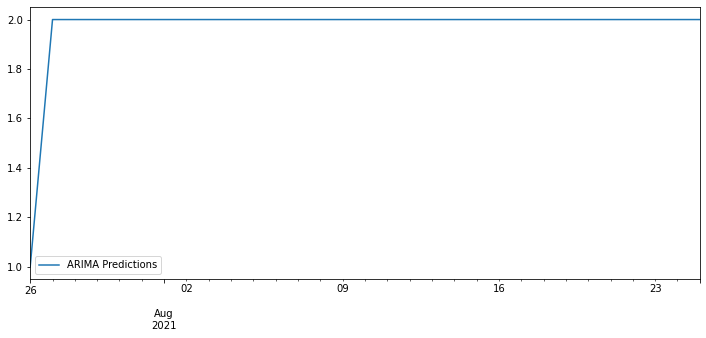

In [14]:
pred.plot(figsize=(12,5),legend=True)

In [15]:
from sklearn.metrics import mean_absolute_error
mae_new_deaths=mean_absolute_error(pred2,test['new_deaths'])
print('Mean absolute error of new deaths is:',mae_new_deaths)

Mean absolute error of new deaths is: 1.0257118990784115


In [16]:
import math 
from statistics import mean
mean_new_deaths = mean(test['new_deaths'])
print(mean_new_deaths)

0.72


In [17]:
index_future_dates2=pd.date_range(start='2021-07-26',end='2027-01-16')
pred3=model2.predict(start=len(dataset),end=len(dataset)+2000,typ='levels').rename('ARIMA Predictions2')
pred3.index=index_future_dates2
pred3=pred3.round()
print(pred3)

2021-07-26    1.0
2021-07-27    2.0
2021-07-28    2.0
2021-07-29    2.0
2021-07-30    2.0
             ... 
2027-01-12    2.0
2027-01-13    2.0
2027-01-14    2.0
2027-01-15    2.0
2027-01-16    2.0
Freq: D, Name: ARIMA Predictions2, Length: 2001, dtype: float64


In [18]:
tilljan27 = pd.DataFrame(pred3)
tilljan27

,ARIMA Predictions2
2021-07-26,1.0
2021-07-27,2.0
2021-07-28,2.0
2021-07-29,2.0
2021-07-30,2.0
...,...
2027-01-12,2.0
2027-01-13,2.0
2027-01-14,2.0
2027-01-15,2.0


In [19]:
def forecastforthatday(a,b):
    return tilljan27.loc[a:b]

In [ ]:
DD= input("ENTER A DAY (YYYY-MM-DD:)")

In [ ]:
MM= DD
print("The number of new deaths on", DD ,"were:",forecastforthatday(DD,MM) )